In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

/opt/homebrew/Caskroom/miniforge/base/envs/elec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import to_upward

In [3]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")

In [4]:
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = to_upward.pad_str(str_list, target_len)

data.Code = padded_str_list

In [5]:
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220904 20230904


In [6]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [7]:
stocks = recommendation["Name"].to_list()

In [8]:
tmp = to_upward.get_close(data,stocks,start,end)
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
2022-09-07,56000,90400,246000,623000,202000,82300,94400,19650,332000,79800,422500,72600,300000
2022-09-08,55600,90400,241500,644000,200000,80900,93800,20000,337500,80900,419500,72100,304500
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500
2023-08-30,67100,119400,580000,576000,187800,80400,100100,17030,268000,102700,447000,113500,326500
2023-08-31,66900,121800,579000,583000,189100,80200,98500,16660,270000,103300,452000,117600,331000


In [9]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

# 최대 Shape 예시

In [10]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]
rf = 0.0325

In [11]:
max_shape,min_risk,tmp2,df =to_upward.get_portfolio(stocks,annual_ret,annual_cov)

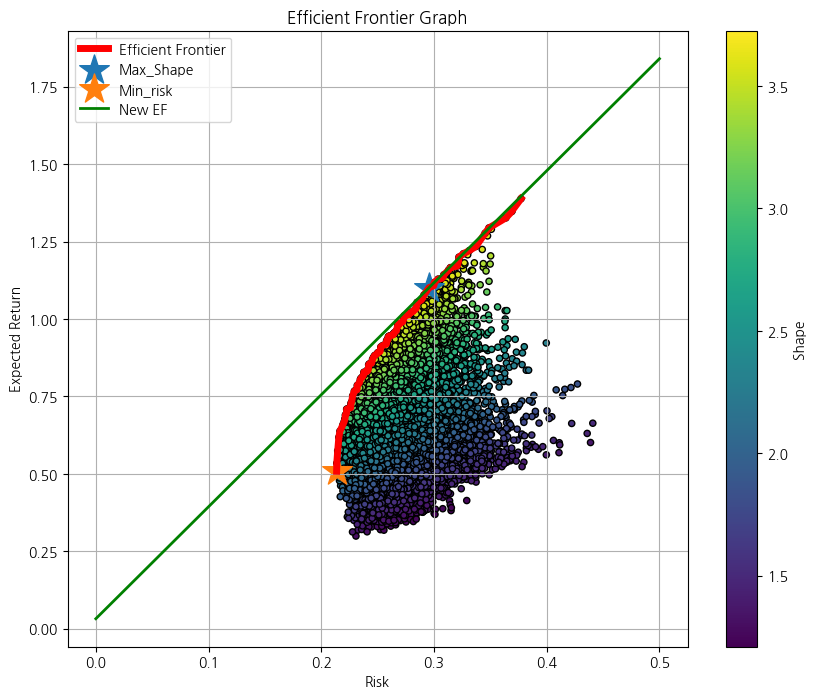

In [12]:
to_upward.show_CAPM(df,tmp2,max_shape,min_risk,rf=rf)

In [13]:
to_upward.show_portfolio(max_shape)

채권의 비중 : 0.6484948876101777
이 경우 Risk : 0.10389243614761028


In [14]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
26102,584064.795358,113326.688103,137609.320903,157458.431104,7540.764532


In [15]:
sim_num = 1000
balance_df = to_upward.monte_sim(sim_num,tmp,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,...,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,1.047203e+06,9.879045e+05,9.949443e+05,1.010104e+06,9.975422e+05,1.005903e+06,9.957383e+05,1.017333e+06,993417.727065,9.756426e+05,...,1.013750e+06,972316.204072,1.016369e+06,1.006109e+06,1.004698e+06,9.854559e+05,1.006115e+06,1.046530e+06,1.016818e+06,9.729093e+05
2,1.061249e+06,1.007082e+06,9.793142e+05,9.924649e+05,1.003975e+06,1.011626e+06,9.948847e+05,1.017082e+06,948653.479009,1.012113e+06,...,1.025435e+06,960030.052108,1.000114e+06,9.981077e+05,1.008426e+06,9.769185e+05,1.005808e+06,1.035820e+06,1.029687e+06,1.004434e+06
3,1.037499e+06,1.030557e+06,9.746658e+05,9.687610e+05,1.004717e+06,1.022257e+06,1.003558e+06,1.012848e+06,934816.252904,9.803710e+05,...,1.024543e+06,946825.598206,1.007591e+06,1.006612e+06,1.007346e+06,9.902029e+05,1.003074e+06,1.018406e+06,1.061632e+06,9.900411e+05
4,1.032013e+06,1.033839e+06,9.536967e+05,9.747745e+05,1.002558e+06,1.015440e+06,1.014038e+06,9.956191e+05,929947.369469,9.829883e+05,...,1.007842e+06,957825.749289,1.040068e+06,1.019682e+06,1.011421e+06,1.010818e+06,1.016783e+06,1.011898e+06,1.086961e+06,9.994522e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.190922e+06,8.734620e+05,9.461080e+05,7.971497e+05,1.091345e+06,8.214595e+05,1.287341e+06,1.384687e+06,913743.301607,9.759652e+05,...,1.167019e+06,920225.171790,7.461198e+05,1.057188e+06,9.093800e+05,9.410592e+05,1.030391e+06,7.857708e+05,1.152471e+06,1.119705e+06
96,1.187064e+06,8.996562e+05,9.835137e+05,7.998228e+05,1.129009e+06,8.153755e+05,1.234897e+06,1.358343e+06,898899.916607,1.011169e+06,...,1.167366e+06,921419.504833,7.621172e+05,1.032999e+06,9.007986e+05,9.415353e+05,1.026263e+06,7.880359e+05,1.148624e+06,1.098804e+06
97,1.183195e+06,9.025789e+05,9.936749e+05,7.776027e+05,1.136516e+06,7.996951e+05,1.257030e+06,1.335282e+06,897240.546569,9.929967e+05,...,1.169155e+06,919697.720862,7.493548e+05,1.025771e+06,9.152512e+05,9.857518e+05,1.046942e+06,7.876888e+05,1.155064e+06,1.096986e+06
98,1.210499e+06,8.989275e+05,1.012269e+06,7.599687e+05,1.131576e+06,8.273616e+05,1.315356e+06,1.321816e+06,903660.390556,1.022409e+06,...,1.170500e+06,935677.294954,7.529111e+05,1.022200e+06,9.201023e+05,9.792118e+05,1.071367e+06,7.916217e+05,1.181290e+06,1.073732e+06


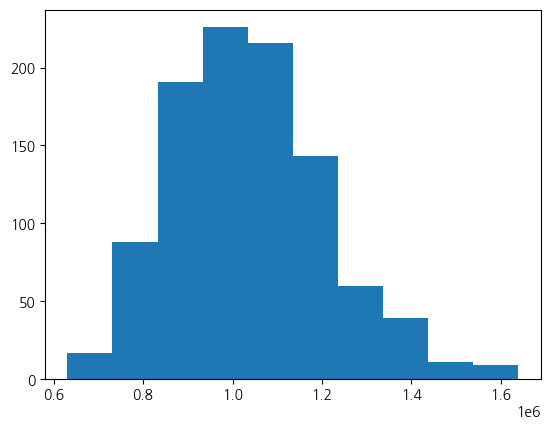

In [16]:
plt.hist(balance_df.iloc[99])
plt.show()

In [17]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') 
pd.DataFrame(balance_df.iloc[99].quantile([0.5,0.9]).to_numpy(),columns=['포트폴리오가치'],index=['50%','90%'])

,포트폴리오가치
50%,"1,020,331.76"
90%,"1,255,830.35"
